In [69]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import numpy as np 


In [6]:
def load_and_convert_image(image_path, target_height = 256, target_width = 256):
    """
    Load an image from a file path and convert it into a TensorFlow tensor.

    Args:
    - image_path: Path to the image file.

    Returns:
    - image: A TensorFlow tensor representing the loaded image with values in the range [0, 1].
    """
    # Read the image file
    img_raw = tf.io.read_file(image_path)

    # Decode the image, assuming it is in RGB format
    image = tf.image.decode_image(img_raw, channels=3)

    # Convert image to floating point values in the range [0, 1]
    image = tf.image.convert_image_dtype(image, tf.float32)

    resized_image = tf.image.resize(image, [target_height, target_width])

    return resized_image


In [7]:
image_path = 'C:/Users/admin/Desktop/Project/project-tumor-detection/research/Tr-me_0034.jpg'
image1 = load_and_convert_image(image_path)

In [8]:
def apply_median_filter(image):
    """
    Apply a median filter to an image.

    Args:
    - image: A tensor representing an image.

    Returns:
    - filtered_image: The image after applying the median filter.
    """

    filtered_image = tfa.image.median_filter2d(image, filter_shape=(3, 3))

    return filtered_image

In [9]:
image2 = apply_median_filter(image1)

In [39]:
def segment_image(image):
    """
    Apply simple thresholding to segment the image.
    
    Args:
    - image: The input image tensor.
    - label: The corresponding label tensor.
    
    Returns:
    - segmented_image: The segmented image tensor.
    - label: The unchanged label tensor.
    """
    # Convert the image to grayscale if it's not already
    image_gray = tf.image.rgb_to_grayscale(image) if image.shape[-1] == 3 else image
    
    # Normalize the image tensor to [0, 1]
    image_normalized = image_gray / 255.0
    
    # Define the threshold value
    threshold = 0.1 # This is a normalized threshold since the image is normalized
    
    # Apply thresholding
    segmented_image = tf.where(image_normalized < threshold, 0.0, 1.0)
    
    # The output segmented_image will have values 0 for background and 1 for foreground
    
    return segmented_image

In [40]:
image3 = segment_image(image2)

In [41]:
def display_image_tensor(image_tensor):
    """
    Displays an image contained in a TensorFlow tensor.

    Args:
    - image_tensor: A TensorFlow tensor representing an image.
    """
    # Convert the tensor to a numpy array
    image_numpy = image_tensor.numpy()

    # Display the image using matplotlib
    plt.imshow(image_numpy)
    plt.axis('off')  # Hide the axis
    plt.show()


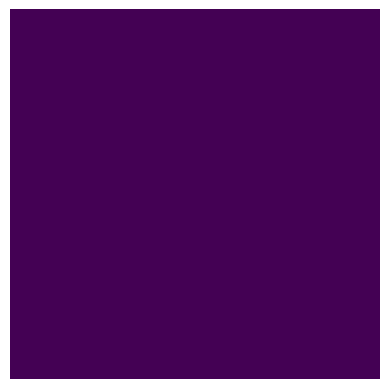

In [42]:
display_image_tensor(image3)

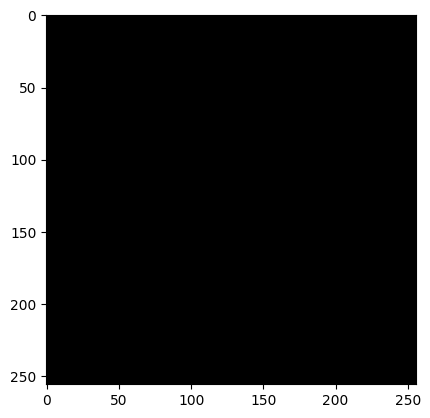

In [43]:
plt.imshow(image3, cmap='gray')
plt.show()

In [64]:
def segment_image(image):
    """
    Apply simple thresholding to segment the image.
    
    Args:
    - image: The input image tensor.
    
    Returns:
    - segmented_image: The segmented image tensor, with foreground as 1 and background as 0.
    """
    # Convert the image to grayscale if it's not already
    image_gray = tf.image.rgb_to_grayscale(image) if image.shape[-1] == 3 else image
    
    # Normalize the image tensor to [0, 1]
    image_normalized = image_gray  #/ 255.0
    
    # Define the threshold value
    threshold = 0.3 # This is a normalized threshold since the image is normalized
    
    # Apply thresholding
    segmented_image = tf.where(image_normalized < threshold, 0.0, 1.0)
    
    # Ensure the segmented image is returned in a suitable format for visualization
    # Convert segmented_image to a suitable type for visualization (e.g., uint8) if necessary
    segmented_image_uint8 = tf.cast(segmented_image * 255, tf.uint8)
    
    return segmented_image_uint8


In [65]:
segmented_image = segment_image(image2)

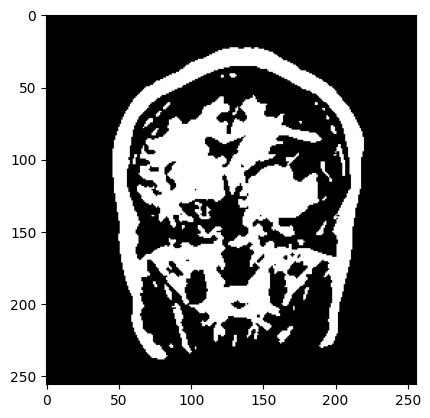

In [66]:
import matplotlib.pyplot as plt

# Assuming `segmented_image` is the output from the `segment_image` function
plt.imshow(segmented_image, cmap='gray')
plt.show()


In [72]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def prepare_image(image):
    img_array = img_to_array(image)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return img_array_expanded_dims

In [73]:
preprocessed_image = prepare_image(segmented_image)


# Loading the model

In [62]:
from tensorflow.keras.models import load_model

model = load_model('my_mlp_model')


In [81]:

prediction = model.predict(segmented_image)
predicted_class = np.argmax(prediction, axis=1)  # Assuming a multi-class classification problem

print(f"Predicted class: {predicted_class}")

ValueError: in user code:

    File "c:\Users\admin\anaconda3\envs\brain_tumor_env\lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\admin\anaconda3\envs\brain_tumor_env\lib\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\admin\anaconda3\envs\brain_tumor_env\lib\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\admin\anaconda3\envs\brain_tumor_env\lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "c:\Users\admin\anaconda3\envs\brain_tumor_env\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\admin\anaconda3\envs\brain_tumor_env\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 65536, but received input with shape (32, 256)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(32, 256, 1), dtype=uint8)
      • training=False
      • mask=None


# Testing

In [78]:
image_path = 'C:/Users/admin/Desktop/Project/project-tumor-detection/research/Tr-pi_0011.jpg'


In [79]:
image1 = load_and_convert_image(image_path)
image2 = apply_median_filter(image1)
image3 = segment_image(image2)
image4 = prepare_image(image3)

In [80]:
prediction = model.predict(image4)
predicted_class = np.argmax(prediction, axis=1)  # Assuming a multi-class classification problem

print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 24ms/step
Predicted class: [2]


In [89]:
type(image4)

numpy.ndarray

In [93]:
!pip install scikit-image -q

In [82]:
#KNN

In [91]:
from joblib import load

knn_model = load('my_knn_model.joblib')

In [96]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from skimage.transform import resize
# from joblib import load  # Uncomment this line if your model is saved with joblib

def preprocess_image(image, target_size=(256, 256), flatten=True):
    """
    Preprocess the image for KNN model prediction.
    
    Parameters:
    - image: numpy.ndarray, the image to preprocess.
    - target_size: tuple, the target size (width, height) of the image.
    - flatten: bool, whether to flatten the image to a 1D array.
    
    Returns:
    - preprocessed_image: numpy.ndarray, the preprocessed image.
    """
    # Resize the image to the target size
    resized_image = resize(image, target_size, anti_aliasing=True)
    
    # Flatten the image if required
    if flatten:
        preprocessed_image = resized_image.flatten()
    else:
        preprocessed_image = resized_image
    
    # Ensure the image is a single sample by adding an extra dimension if flattened
    if flatten:
        preprocessed_image = preprocessed_image.reshape(1, -1)
    
    return preprocessed_image

import cv2

def preprocess_image_opencv(image, target_size=(256, 256), flatten=True):
    """
    Preprocess the image for KNN model prediction using OpenCV.
    
    Parameters:
    - image: numpy.ndarray, the image to preprocess.
    - target_size: tuple, the target size (width, height) of the image.
    - flatten: bool, whether to flatten the image to a 1D array.
    
    Returns:
    - preprocessed_image: numpy.ndarray, the preprocessed image.
    """
    # Resize the image to the target size with OpenCV
    resized_image = cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)
    
    # Flatten the image if required
    if flatten:
        preprocessed_image = resized_image.flatten()
    else:
        preprocessed_image = resized_image
    
    # Ensure the image is a single sample by adding an extra dimension if flattened
    if flatten:
        preprocessed_image = preprocessed_image.reshape(1, -1)
    
    return preprocessed_image


def predict_with_knn(model, image):
    """
    Make a prediction with a KNN model given a preprocessed image.
    
    Parameters:
    - model: KNeighborsClassifier, the trained KNN model.
    - image: numpy.ndarray, the preprocessed image.
    
    Returns:
    - prediction: the predicted class for the image.
    """
    # Preprocess the image
    preprocessed_image = preprocess_image_opencv(image)
    
    # Make a prediction
    prediction = model.predict(preprocessed_image)
    
    return prediction




In [97]:

# Example usage (assuming `knn_model` is your loaded model and `input_image` is your numpy array)
prediction = predict_with_knn(knn_model, image4)
print(f"Predicted class: {prediction}")

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:3789: error: (-215:Assertion failed) !dsize.empty() in function 'cv::hal::resize'
